# imports

In [1]:
import anndata as ad
import scanpy as sc
import numpy as np
import seaborn as sns
import palettable
import pandas as pd
import scipy
import scipy.io as sio
import pickle
import sys
sys.path.append('/home/yzy/bioSIMS/code/analysis')
from utils_220 import *
sc.set_figure_params(dpi=500, color_map='viridis',transparent=True,dpi_save=500)
sc.settings.verbosity = 2
%matplotlib inline


Using TensorFlow backend.
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.bicluster module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


# function

In [2]:
def get_SIMS_data(data,n_matter):



    matter_list_filename_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/matters_candidate.pkl'


#     data = 'P6_neg1_low0_None_auto'
    test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_{1}.mat'



    matter_list_filename = matter_list_filename_temp.format(data)
    test_sample_filename = test_sample_temp.format(data,str(n_matter))
    test_sample_all = sio.loadmat(test_sample_filename)['test_samples']
    
   
    matter_list = pickle.load(open(matter_list_filename,'rb'))
    matter_list = np.array(matter_list)
    return test_sample_all,matter_list

In [3]:
def get_closest_A(matter_list,standard_mz=134.05):
    dif = matter_list-standard_mz
    dif = np.abs(dif)
    return matter_list[np.argsort(dif)[0]]

In [4]:
def show_mz(matter,test_sample,matter_list):
    sns.set_style('white')
    m_idx = np.where(matter_list==matter)
    show_img = np.reshape(test_sample[:,m_idx],(256,256))
    plt.imshow(show_img,cmap='Reds')
    plt.title(str(matter))
    plt.show()

# data loading 

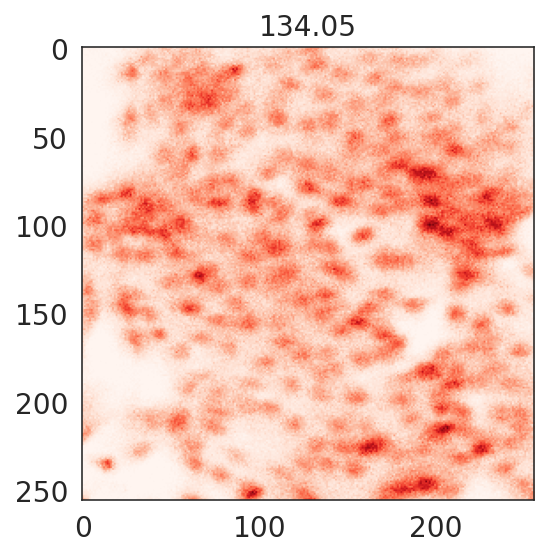

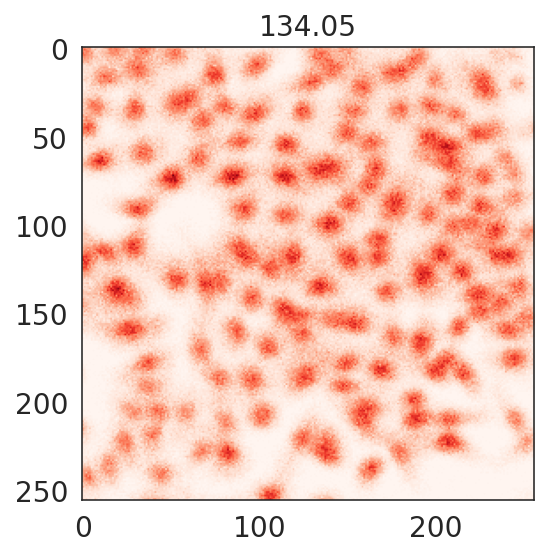

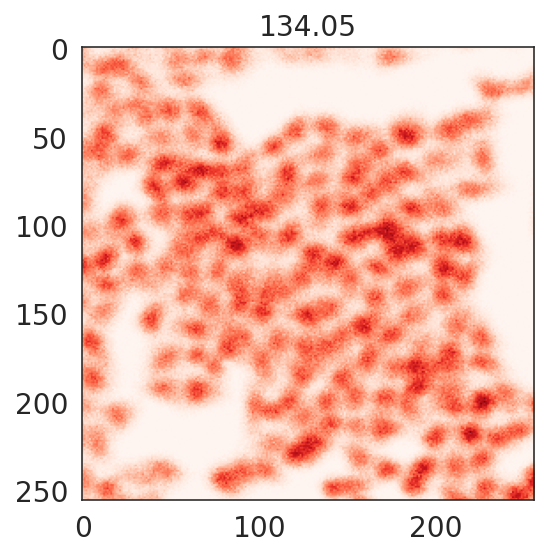

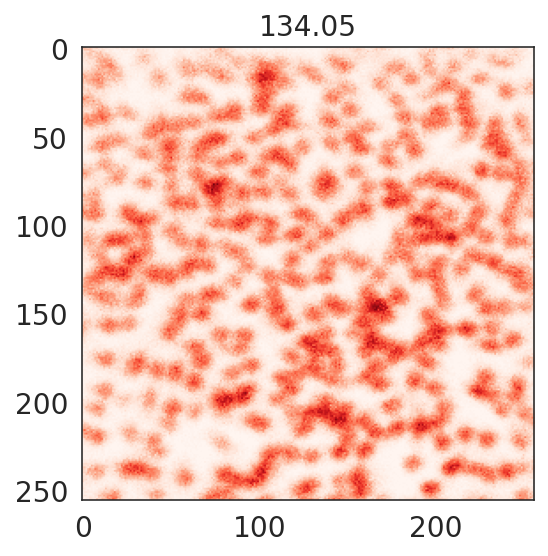

In [5]:
file_list = ['cl_10a_None','cl_a549_None','cl_hela_None','cl_sk_None']
n_matter_list = [274,274,274,274]

A_img_list = []
for i in range(4):
    cur_file = file_list[i]
    cur_n_matter = n_matter_list[i]
    test_sample,matters_candidate = get_SIMS_data(cur_file,cur_n_matter)
    cur_A = get_closest_A(matters_candidate)
    show_mz(cur_A,test_sample,matters_candidate)
    data_134 = test_sample[:,matters_candidate==cur_A][:,0]
    A_img_list.append(data_134)

# data processing 

In [22]:
img = cv.imread('coins.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [23]:
gray.dtype

dtype('uint8')

In [57]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
# img = A_img_list[0]
img = cv.imread('10A.tif')

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# gray = A_img_list[0]
# gray = (gray-gray.min())/(gray.max()-gray.min())*255
# gray = gray.reshape(256,256).astype('uint8')


ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

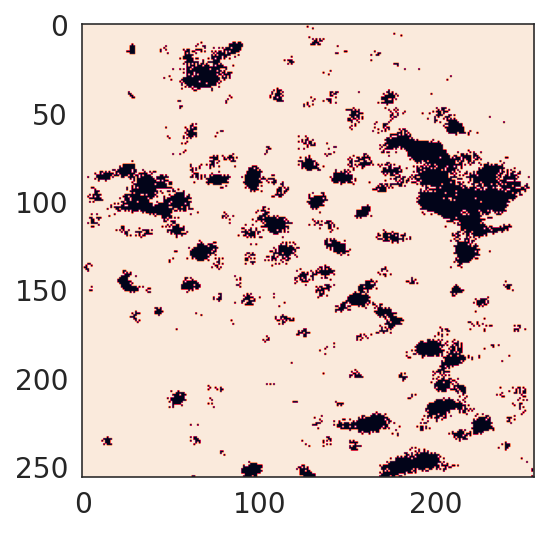

In [58]:
plt.imshow(thresh)

In [59]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

In [60]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

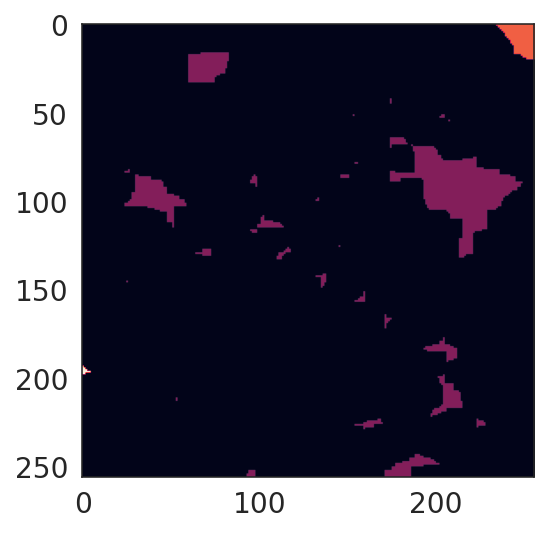

In [61]:
plt.imshow(markers)

In [55]:
img.shape

(256, 256, 3)

In [62]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

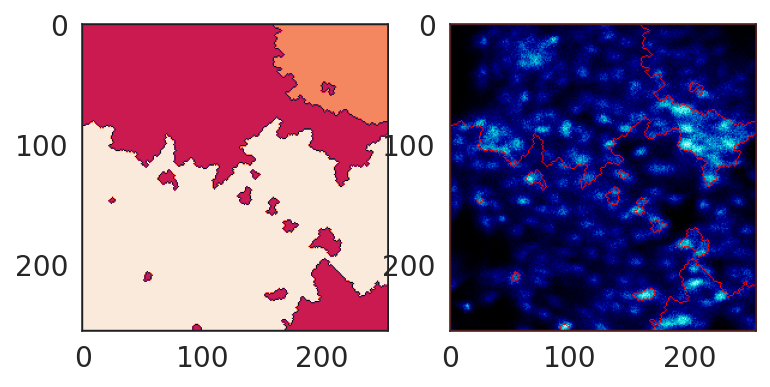

In [63]:
fig,ax=plt.subplots(1,2)
ax[0].imshow(markers)
ax[1].imshow(img)


In [64]:
46376/7704

6.019730010384216